# Final Project-Nataly Valenzuela Mullen 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from math import sqrt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import clean_df data
clean_df= pd.read_csv("clean_df.csv")
clean_df.head(5)

,Name,Change Price?,Category,Character,Color,Buy It Now Price,Image Count,Classification,Hood,Lights,...,FeatureBullet1,FeatureBullet2,FeatureBullet3,FeatureBullet4,FeatureBullet5,Sold Quantity,SoldPriceTotal,TotalCost,TotalProfit,Cost of Total Units Remaining
0,3D Pop Out Reindeer Surprise,False,3D Pop out,Reindeer,black,29.99,6,Men's Sweater,0,0,...,Cotton and Acrylic,Rudolph Pooping Candy Design On Fabric,3D Pop Out Ball Nose On Fabric,Machine Wash Only Do Not Dry Clean,Imported,10,414.90,153.0,261.90,0.0
1,3D Pop Out Reindeer Surprise,True,3D Pop out,Reindeer,black,39.99,6,Men's Sweater,0,0,...,Cotton and Acrylic,Rudolph Pooping Candy Design On Fabric,3D Pop Out Ball Nose On Fabric,Machine Wash Only Do Not Dry Clean,Imported,44,1332.52,673.2,659.32,535.5
2,3D Pop Out Reindeer Surprise,False,3D Pop out,Reindeer,black,39.99,6,Men's Sweater,0,0,...,Cotton and Acrylic,Rudolph Pooping Candy Design On Fabric,3D Pop Out Ball Nose On Fabric,Machine Wash Only Do Not Dry Clean,Imported,15,596.07,229.5,366.57,91.8
3,3D Pop Out Reindeer Surprise,False,3D Pop out,Reindeer,black,39.99,6,Men's Sweater,0,0,...,Cotton and Acrylic,Rudolph Pooping Candy Design On Fabric,3D Pop Out Ball Nose On Fabric,Machine Wash Only Do Not Dry Clean,Imported,15,577.83,229.5,348.33,61.2
4,3D Pop Out Reindeer Surprise,False,3D Pop out,Reindeer,black,39.99,6,Men's Sweater,0,0,...,Cotton and Acrylic,Rudolph Pooping Candy Design On Fabric,3D Pop Out Ball Nose On Fabric,Machine Wash Only Do Not Dry Clean,Imported,30,1233.87,459.0,774.87,153.0


# Exploratory data Analysis

In [3]:
print(clean_df.shape)
cont_df=clean_df.drop(columns=['Hood', 'Lights', 'Change Price?'])
cont_df.describe()

(430, 21)


,Buy It Now Price,Image Count,Sold Quantity,SoldPriceTotal,TotalCost,TotalProfit,Cost of Total Units Remaining
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,40.150465,6.365116,32.609302,1174.419535,432.124279,742.295256,261.424279
std,8.271321,1.688903,39.531120,1500.025450,544.547615,975.364074,489.704645
min,14.990000,2.000000,1.000000,14.990000,8.500000,2.190000,0.000000
25%,34.990000,5.000000,5.000000,155.950000,72.500000,88.082500,0.000000
50%,39.990000,7.000000,18.000000,609.840000,229.500000,359.695000,101.750000
75%,49.990000,8.000000,43.000000,1490.822500,566.025000,876.725000,302.270000
max,49.990000,9.000000,192.000000,7985.910000,2711.500000,5681.910000,4292.000000


In [4]:
cont_df=cont_df.drop(columns=['SoldPriceTotal', 'TotalCost', 'TotalProfit', 'Cost of Total Units Remaining'])

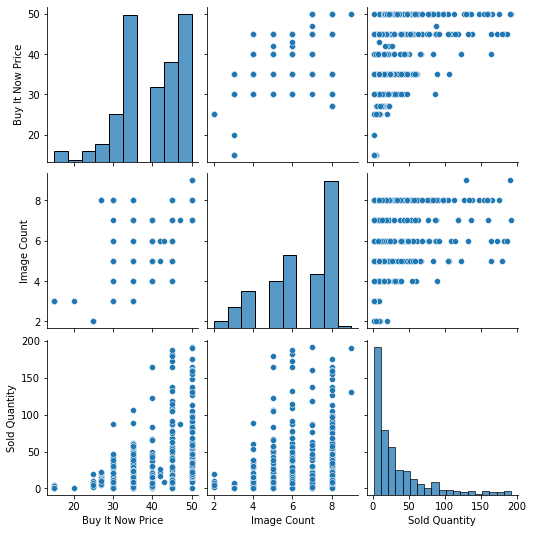

In [5]:
g = sns.pairplot(cont_df)

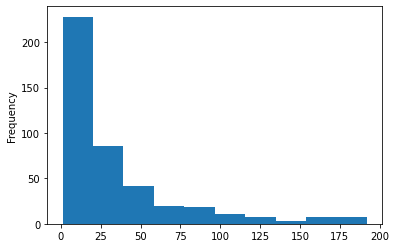

In [6]:
clean_df['Sold Quantity'].plot(kind='hist');

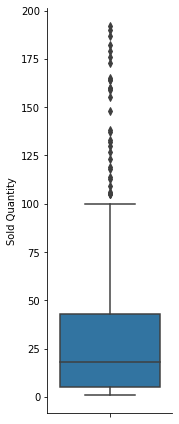

In [7]:
sns.catplot(y="Sold Quantity",kind="box", data=clean_df,  height=6, aspect=6/15 );

In [8]:
corr=cont_df.corr()
corr

,Buy It Now Price,Image Count,Sold Quantity
Buy It Now Price,1.000000,0.595005,0.417595
Image Count,0.595005,1.000000,0.251253
Sold Quantity,0.417595,0.251253,1.000000


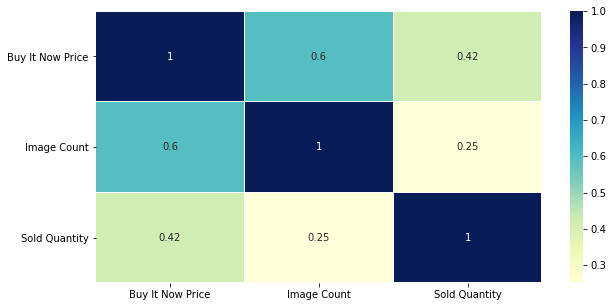

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [10]:
cov=cont_df.cov()
cov
#how much error can be explained

,Buy It Now Price,Image Count,Sold Quantity
Buy It Now Price,68.414750,8.311904,136.543026
Image Count,8.311904,2.852393,16.774684
Sold Quantity,136.543026,16.774684,1562.709470


### Category

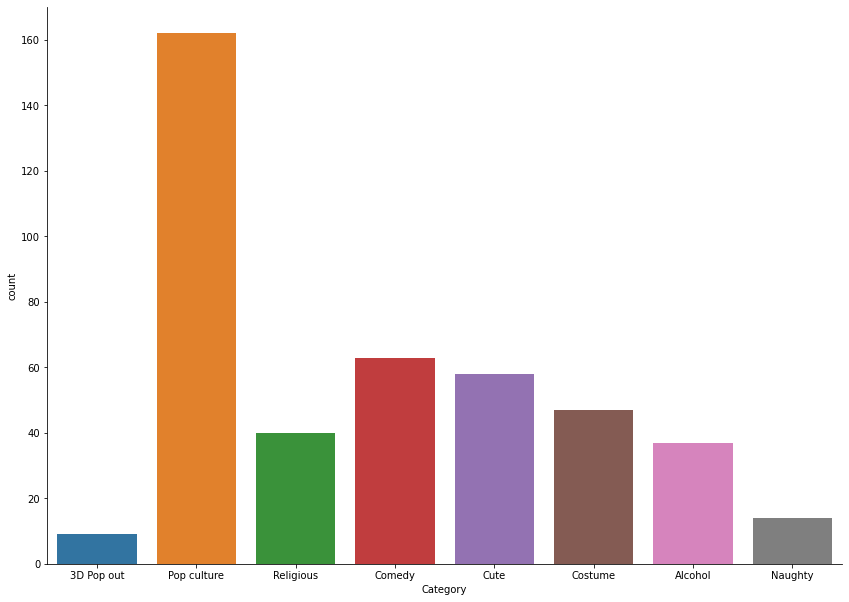

In [11]:
sns.catplot(x="Category",kind="count", data=clean_df,  height=8.27, aspect=11.7/8.27 );

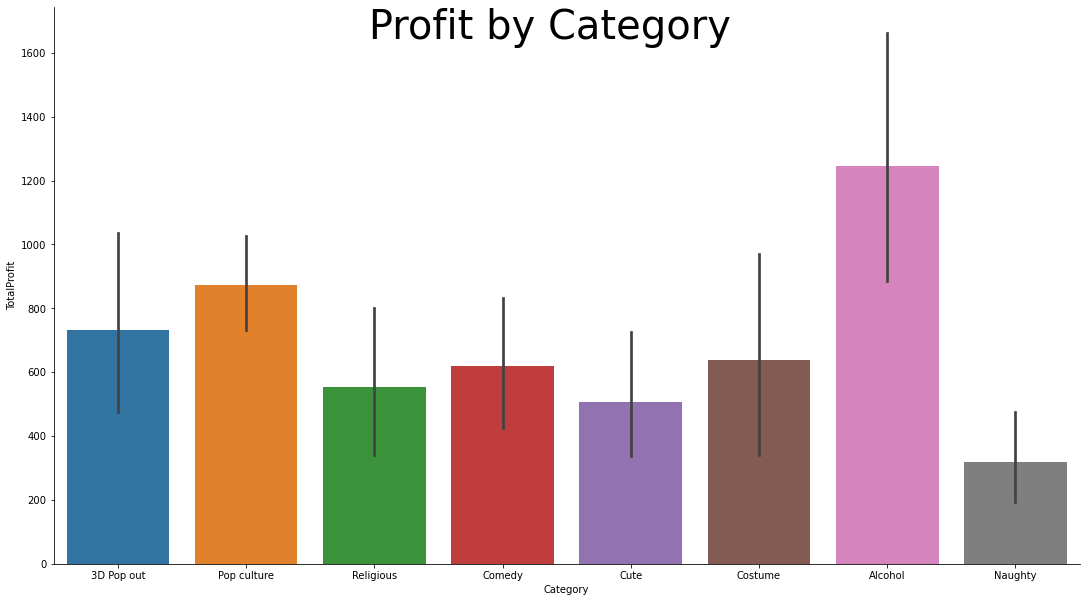

In [12]:
g=sns.catplot(data=clean_df, x='Category', y='TotalProfit', kind="bar", height=8.27, aspect=15/8.27)
g.fig.suptitle('Profit by Category', fontsize=40);

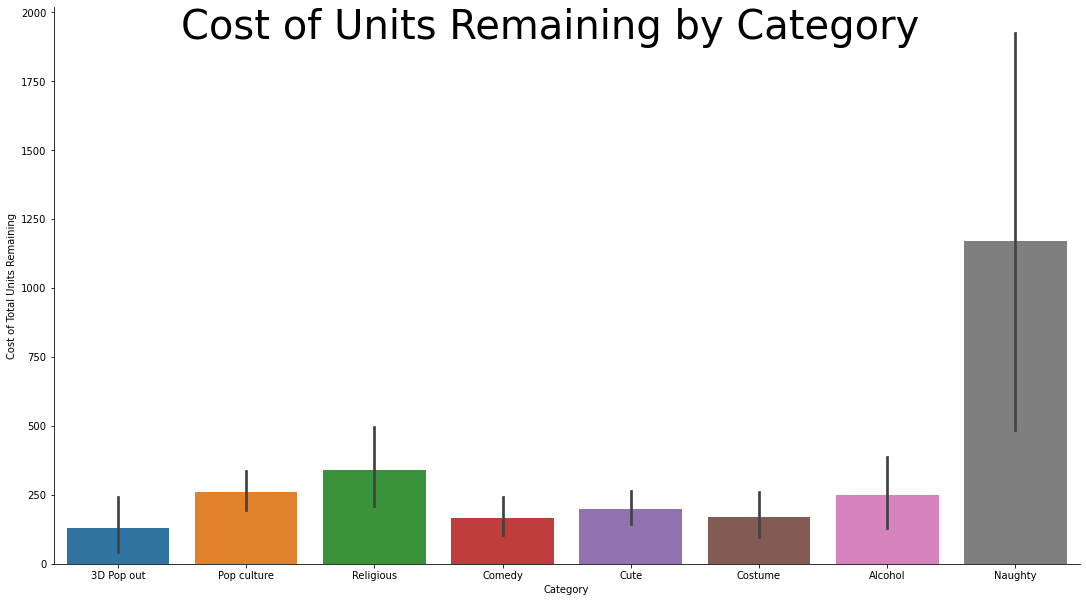

In [13]:
g=sns.catplot(data=clean_df, x='Category', y='Cost of Total Units Remaining', kind="bar", height=8.27, aspect=15/8.27)
g.fig.suptitle('Cost of Units Remaining by Category', fontsize=40);

### Character

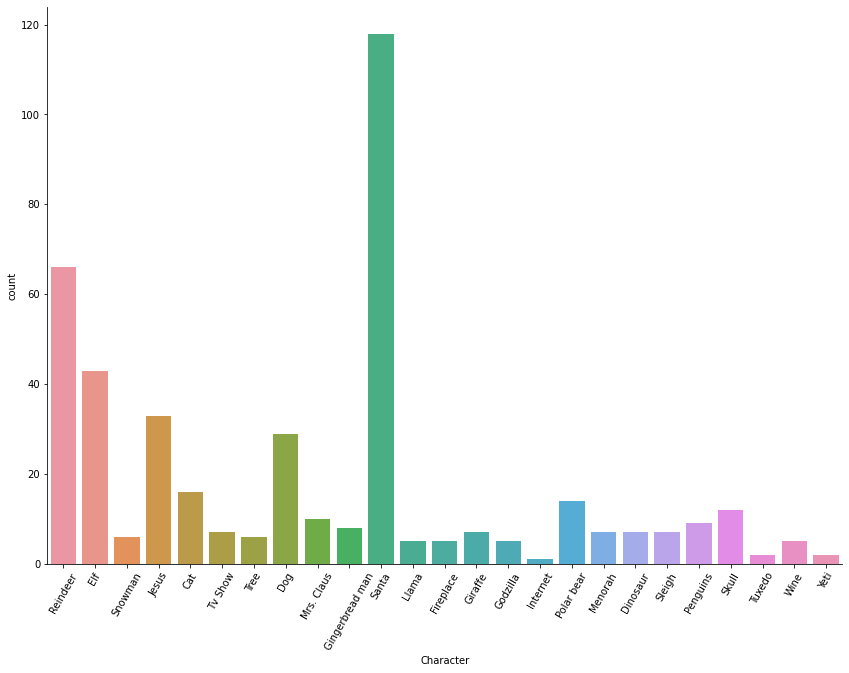

In [14]:
g=sns.catplot(x="Character",kind="count", data=clean_df,  height=8.27, aspect=11.7/8.27 )
# set rotation
g.set_xticklabels(rotation=60);

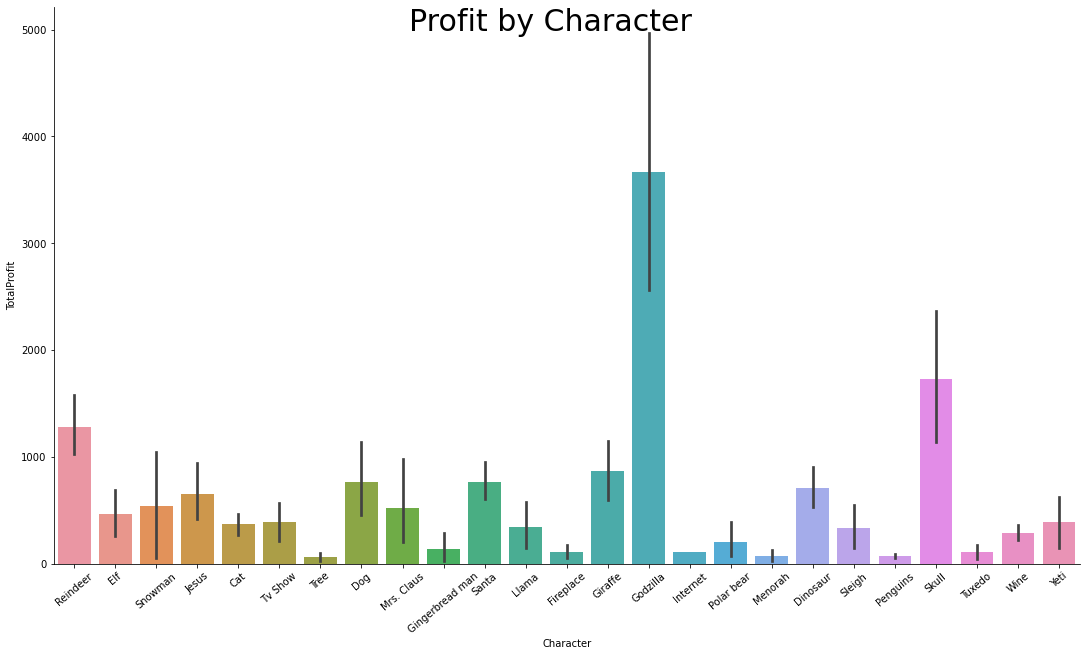

In [15]:
g=sns.catplot(data=clean_df, x='Character', y='TotalProfit', kind="bar", height=8.27, aspect=15/8.27)
# set rotation
g.set_xticklabels(rotation=40)
g.fig.suptitle('Profit by Character', fontsize=30);

In [16]:
# gp_cat=clean_df.groupby(['Category']).mean()
# gp_cat

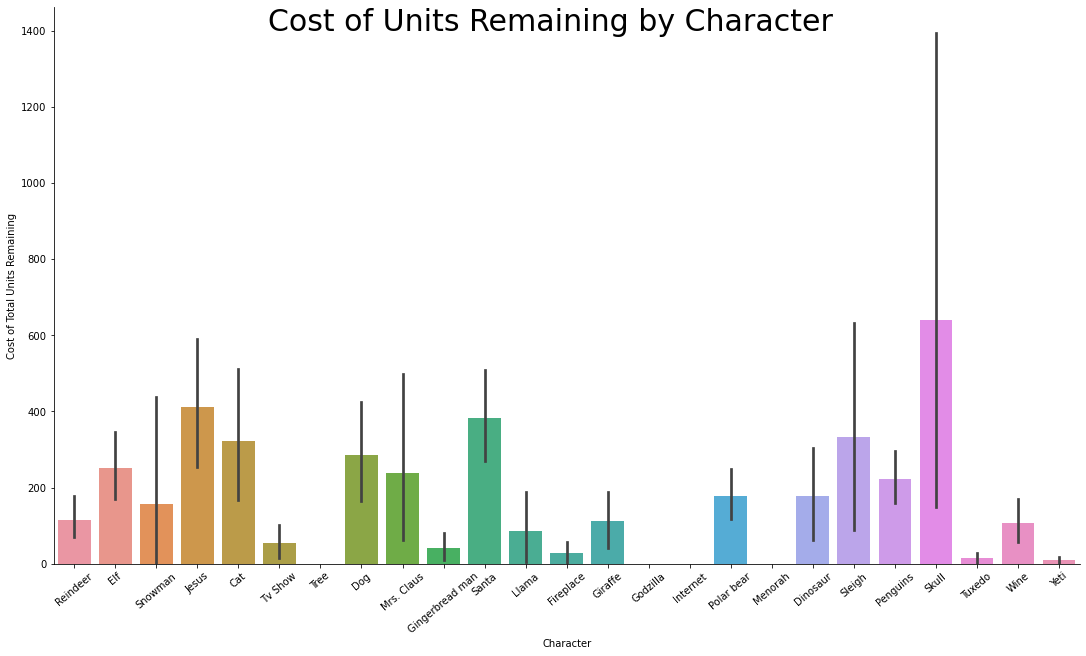

In [17]:
g=sns.catplot(data=clean_df, x='Character', y='Cost of Total Units Remaining', kind="bar", height=8.27, aspect=15/8.27)
# set rotation
g.set_xticklabels(rotation=40)
g.fig.suptitle('Cost of Units Remaining by Character', fontsize=30);

### Color

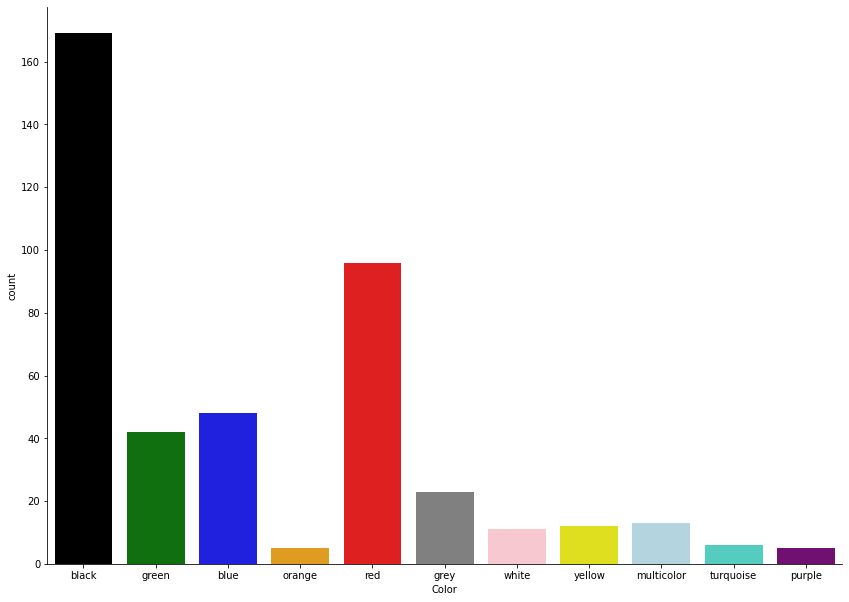

In [18]:
sns.catplot(x="Color",kind="count", data=clean_df,  height=8.27, aspect=11.7/8.27,
           palette=['black','green', 'blue', 'orange', 'red', 'grey', 'pink', 'yellow', 'lightblue', 'turquoise', 'purple']);

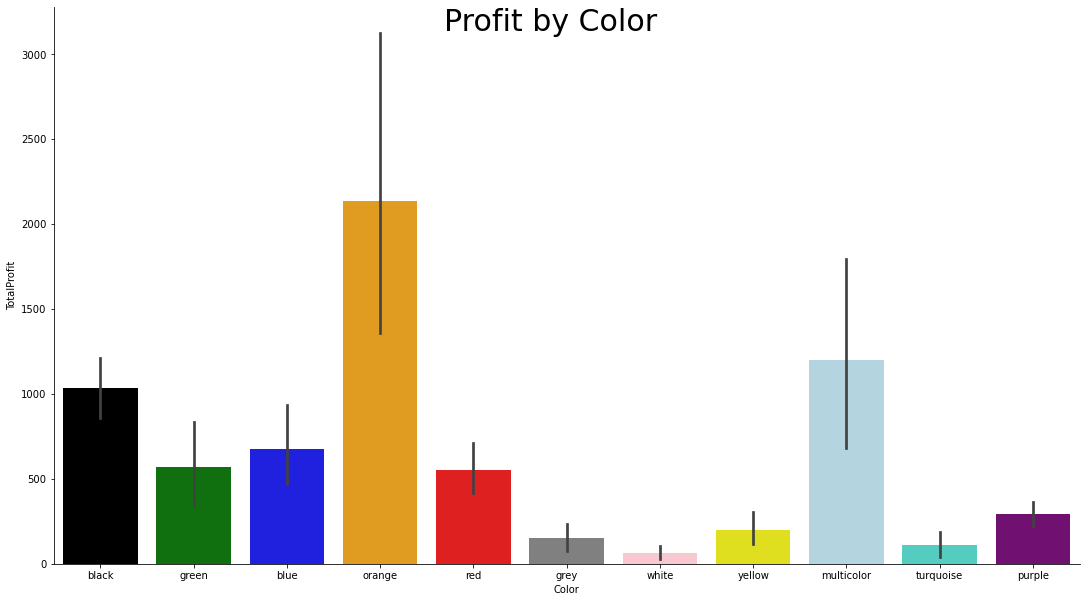

In [19]:
g=sns.catplot(data=clean_df, x='Color', y='TotalProfit', kind="bar", height=8.27, aspect=15/8.27, 
              palette=['black','green', 'blue', 'orange', 'red', 'grey', 'pink', 'yellow', 'lightblue', 'turquoise', 'purple'])
g.fig.suptitle('Profit by Color', fontsize=30);

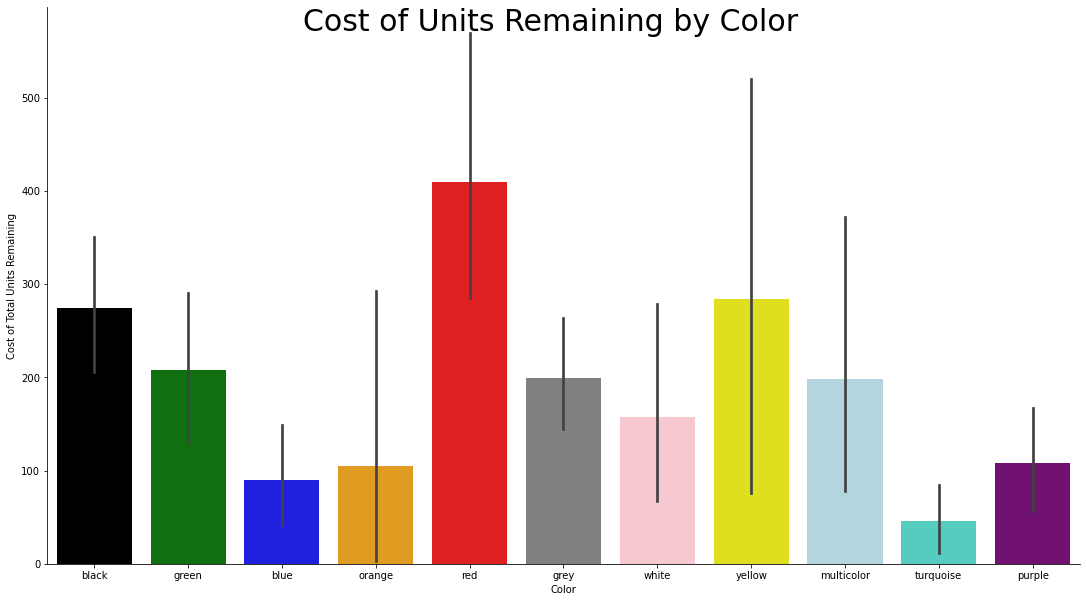

In [20]:
g=sns.catplot(data=clean_df, x='Color', y='Cost of Total Units Remaining', kind="bar", height=8.27, aspect=15/8.27,
             palette=['black','green', 'blue', 'orange', 'red', 'grey', 'pink', 'yellow', 'lightblue', 'turquoise', 'purple'])
g.fig.suptitle('Cost of Units Remaining by Color', fontsize=30);

### Classification

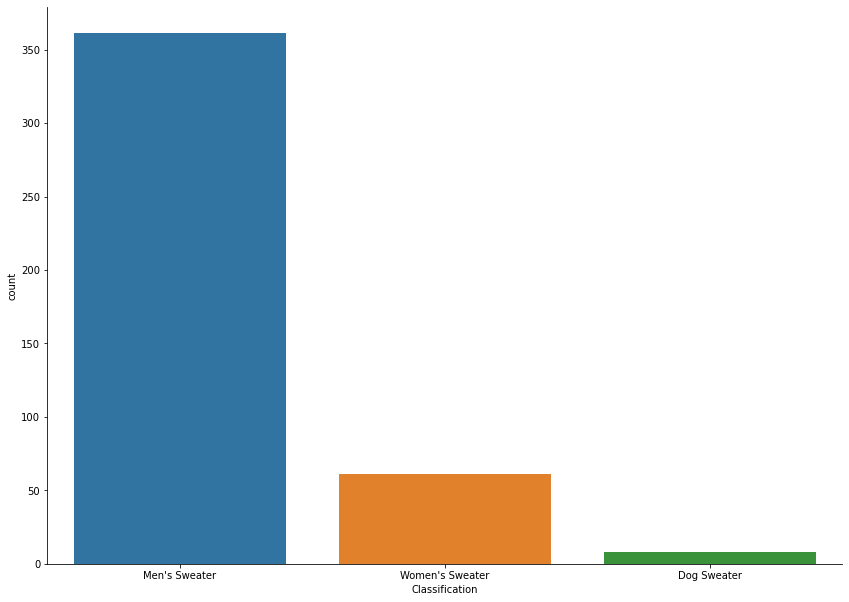

In [21]:
sns.catplot(x="Classification",kind="count", data=clean_df,  height=8.27, aspect=11.7/8.27 );

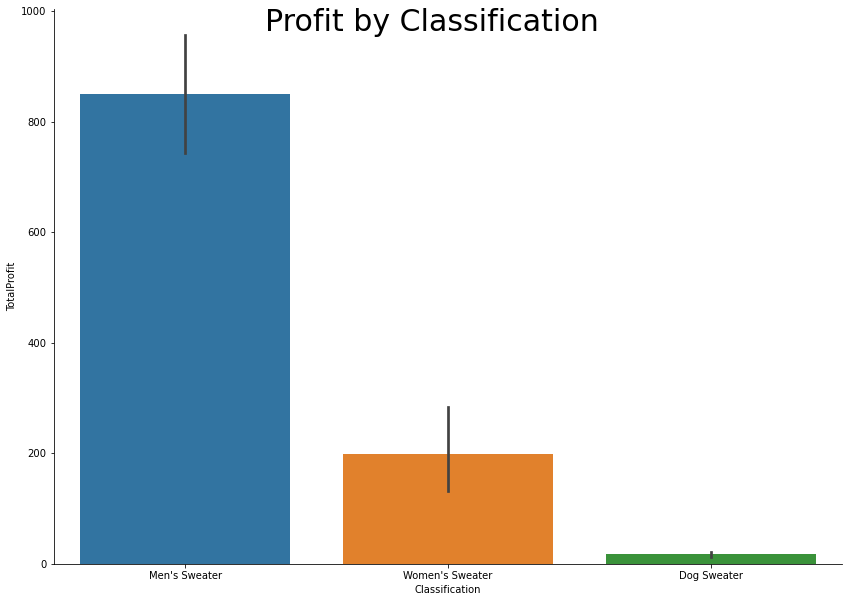

In [22]:
g=sns.catplot(data=clean_df, x='Classification', y='TotalProfit', kind="bar", height=8.27, aspect=11.7/8.27)
g.fig.suptitle('Profit by Classification', fontsize=30);

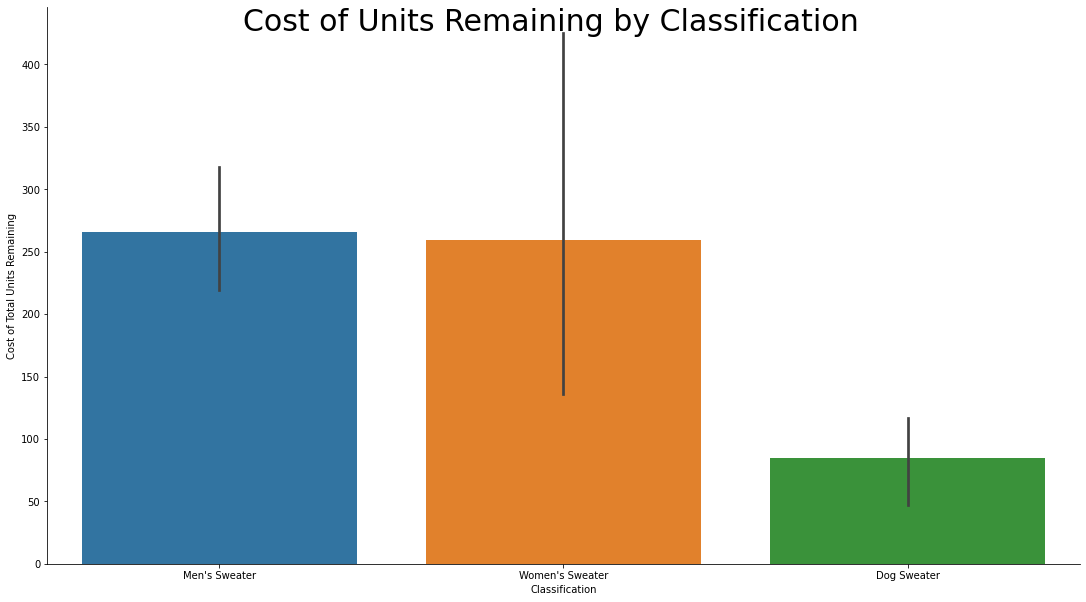

In [23]:
g=sns.catplot(data=clean_df, x='Classification', y='Cost of Total Units Remaining', kind="bar", height=8.27, aspect=15/8.27)
g.fig.suptitle('Cost of Units Remaining by Classification', fontsize=30);

### Size

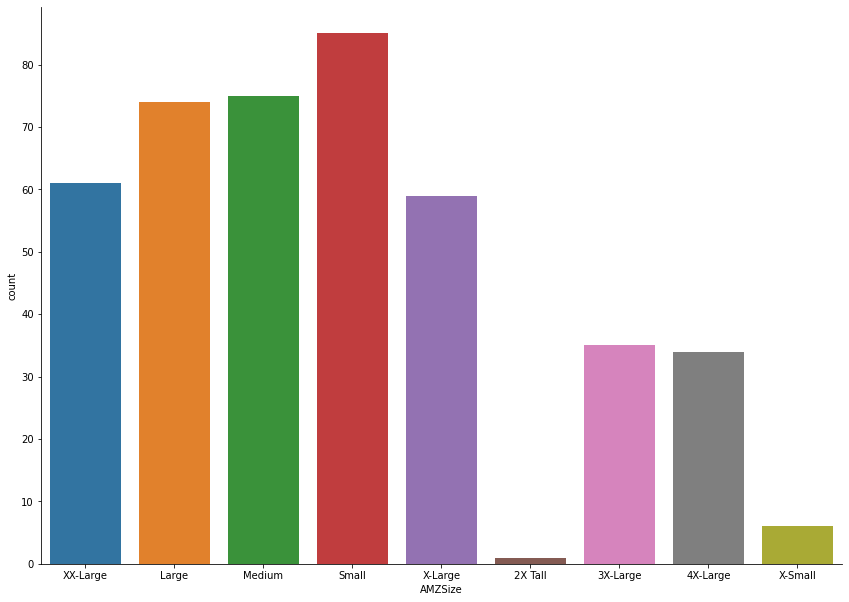

In [24]:
sns.catplot(x="AMZSize",kind="count", data=clean_df,  height=8.27, aspect=11.7/8.27 );

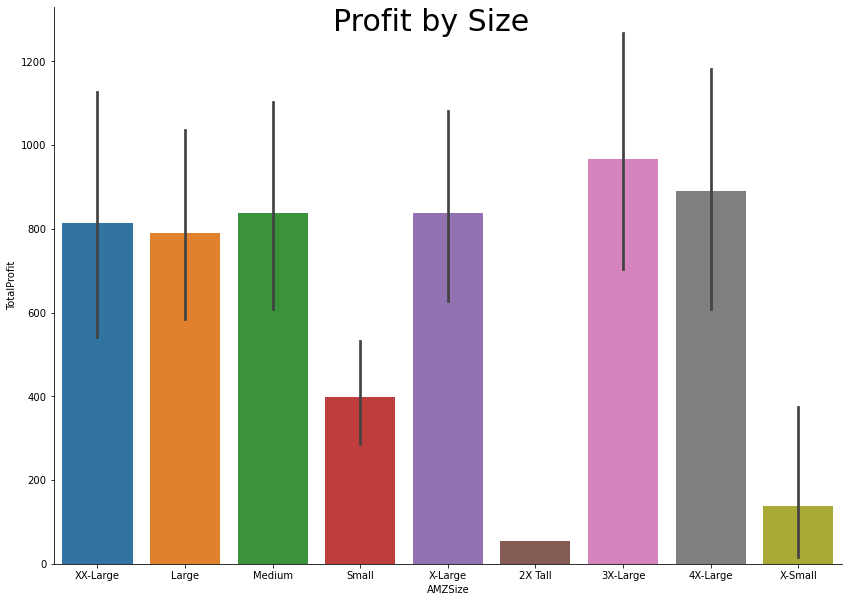

In [25]:
g=sns.catplot(data=clean_df, x='AMZSize', y='TotalProfit', kind="bar", height=8.27, aspect=11.7/8.27)
g.fig.suptitle('Profit by Size', fontsize=30);

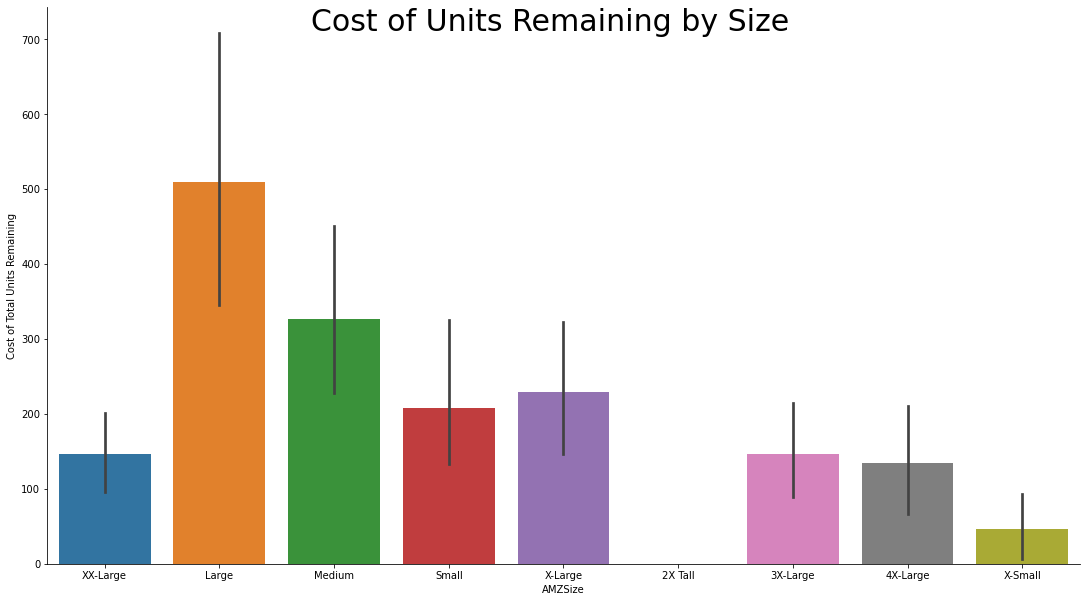

In [26]:
g=sns.catplot(data=clean_df, x='AMZSize', y='Cost of Total Units Remaining', kind="bar", height=8.27, aspect=15/8.27)
g.fig.suptitle('Cost of Units Remaining by Size', fontsize=30);

### Change Price

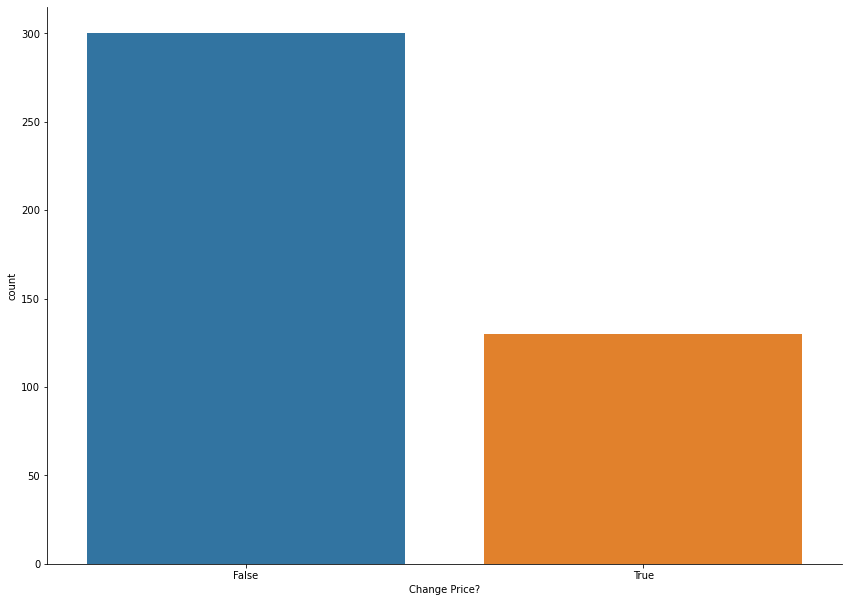

In [27]:
sns.catplot(x="Change Price?",kind="count", data=clean_df,  height=8.27, aspect=11.7/8.27 );

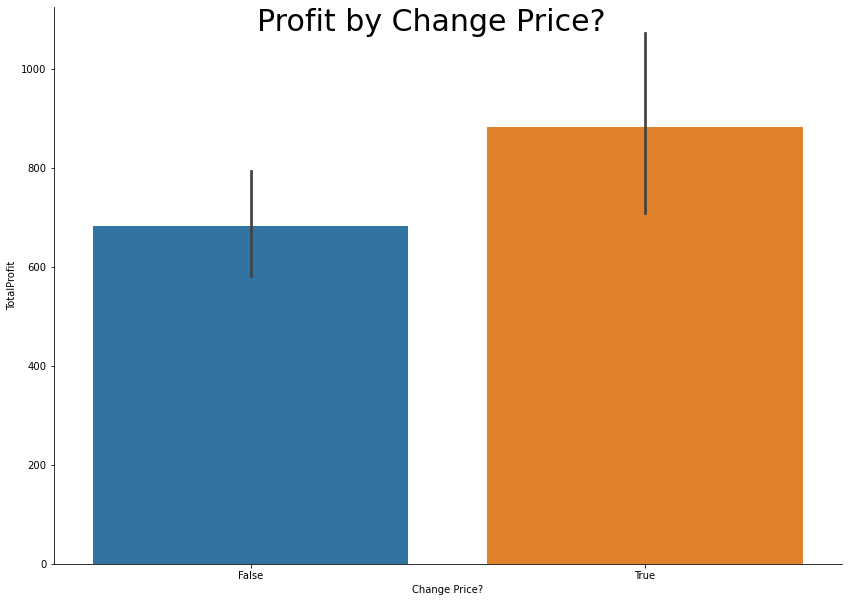

In [28]:
g=sns.catplot(data=clean_df, x='Change Price?', y='TotalProfit', kind="bar", height=8.27, aspect=11.7/8.27)
g.fig.suptitle('Profit by Change Price?', fontsize=30);

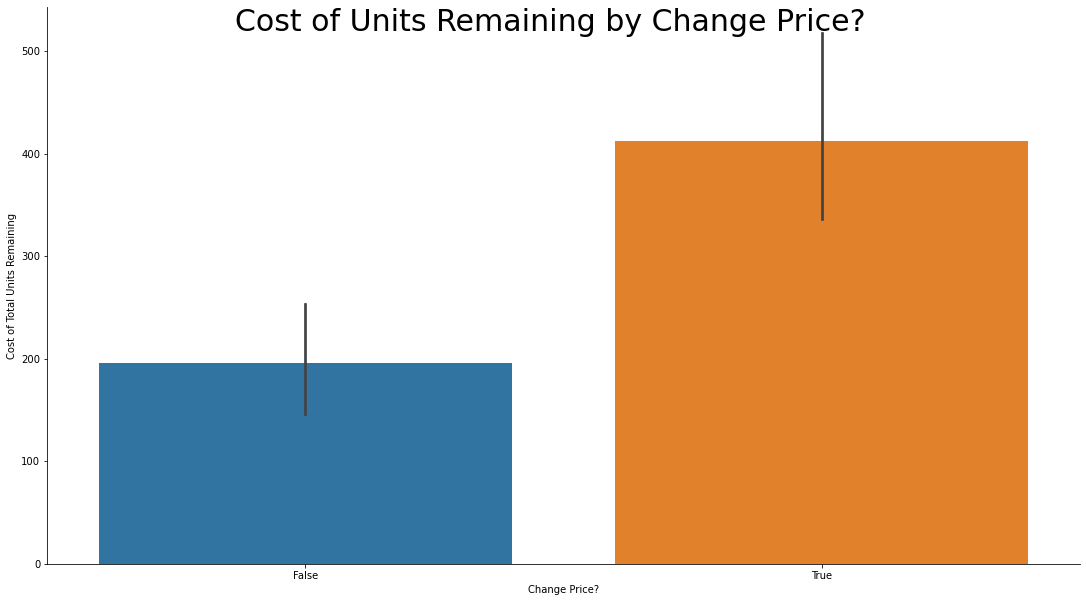

In [29]:
g=sns.catplot(data=clean_df, x='Change Price?', y='Cost of Total Units Remaining', kind="bar", height=8.27, aspect=15/8.27)
g.fig.suptitle('Cost of Units Remaining by Change Price?', fontsize=30);

In [30]:
# # plot catplot
# g = sns.catplot(x="Buy It Now Price", y="Sold Quantity", hue="Subcategory", col="Category", data=clean_df)

# # set rotation
# g.set_xticklabels(rotation=30)

### Lights

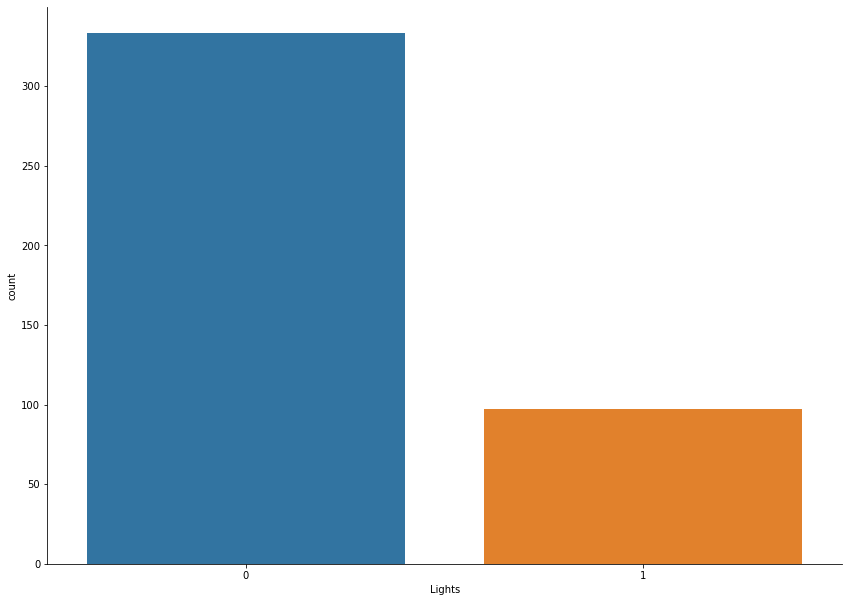

In [31]:
sns.catplot(x="Lights",kind="count", data=clean_df,  height=8.27, aspect=11.7/8.27 );

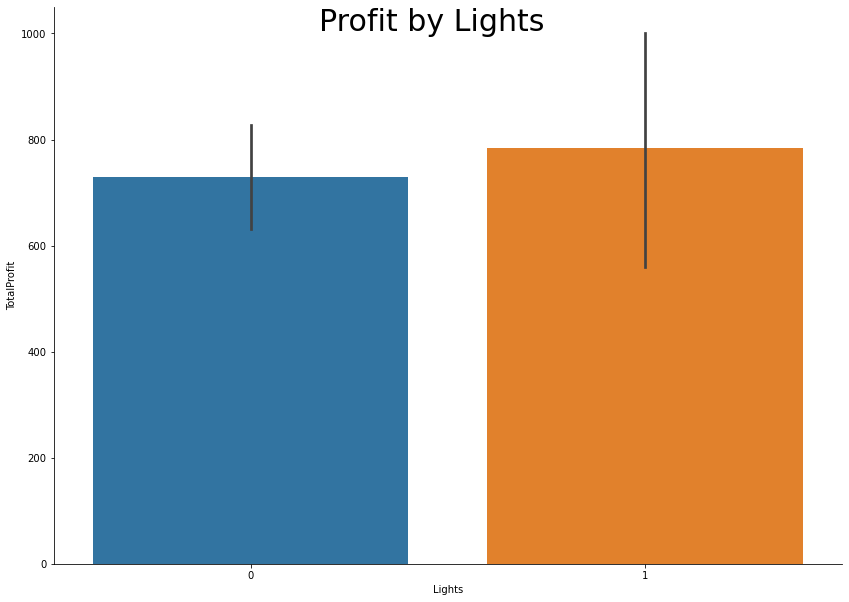

In [32]:
g=sns.catplot(data=clean_df, x='Lights', y='TotalProfit', kind="bar", height=8.27, aspect=11.7/8.27)
g.fig.suptitle('Profit by Lights', fontsize=30);

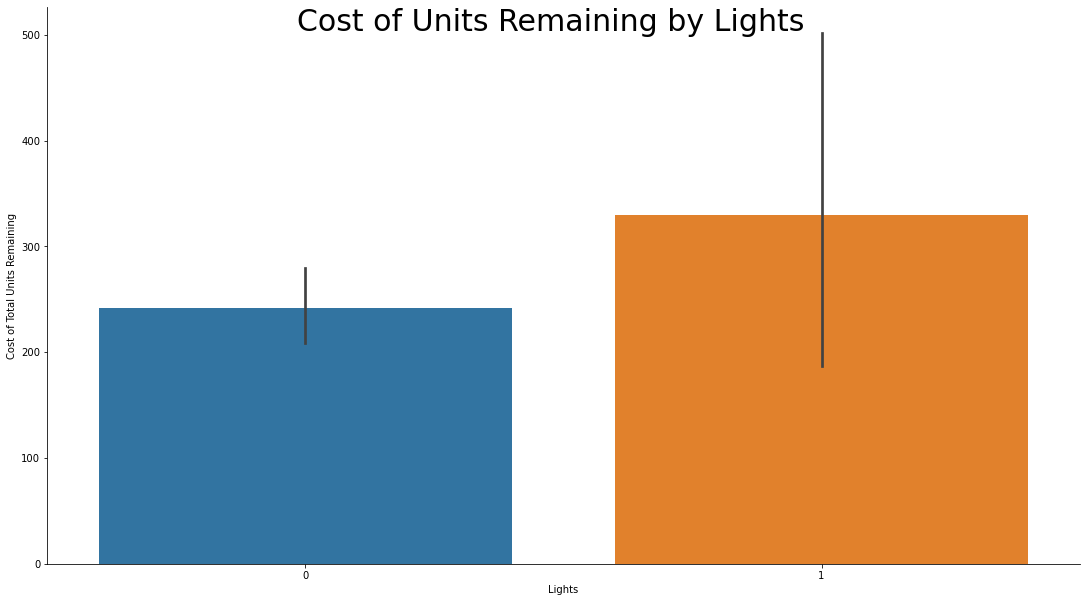

In [33]:
g=sns.catplot(data=clean_df, x='Lights', y='Cost of Total Units Remaining', kind="bar", height=8.27, aspect=15/8.27)
g.fig.suptitle('Cost of Units Remaining by Lights', fontsize=30);

### Hood

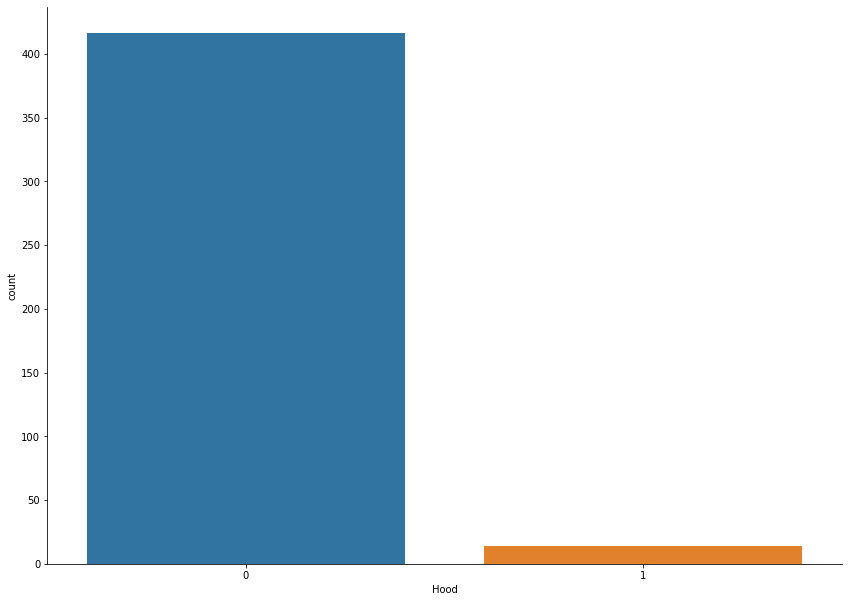

In [34]:
sns.catplot(x="Hood",kind="count", data=clean_df,  height=8.27, aspect=11.7/8.27 );

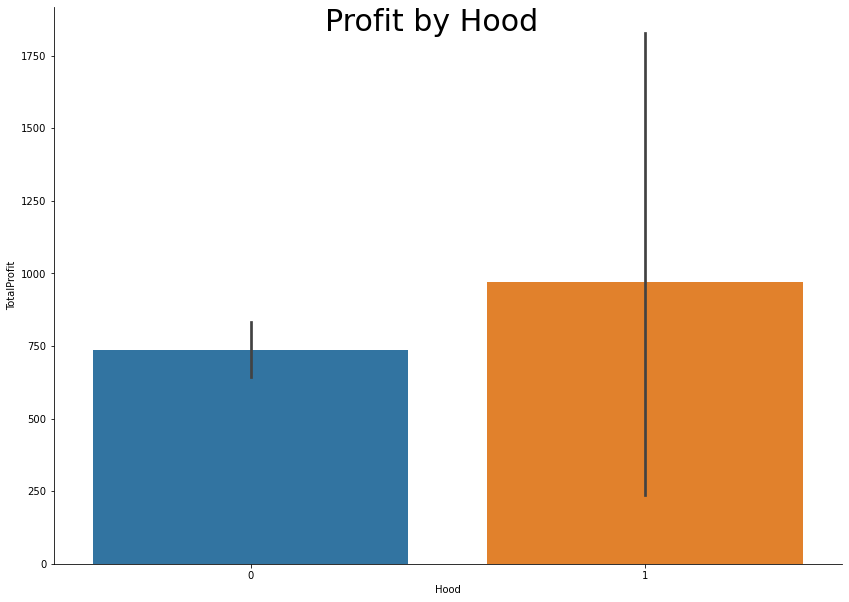

In [35]:
g=sns.catplot(data=clean_df, x='Hood', y='TotalProfit', kind="bar", height=8.27, aspect=11.7/8.27)
g.fig.suptitle('Profit by Hood', fontsize=30);

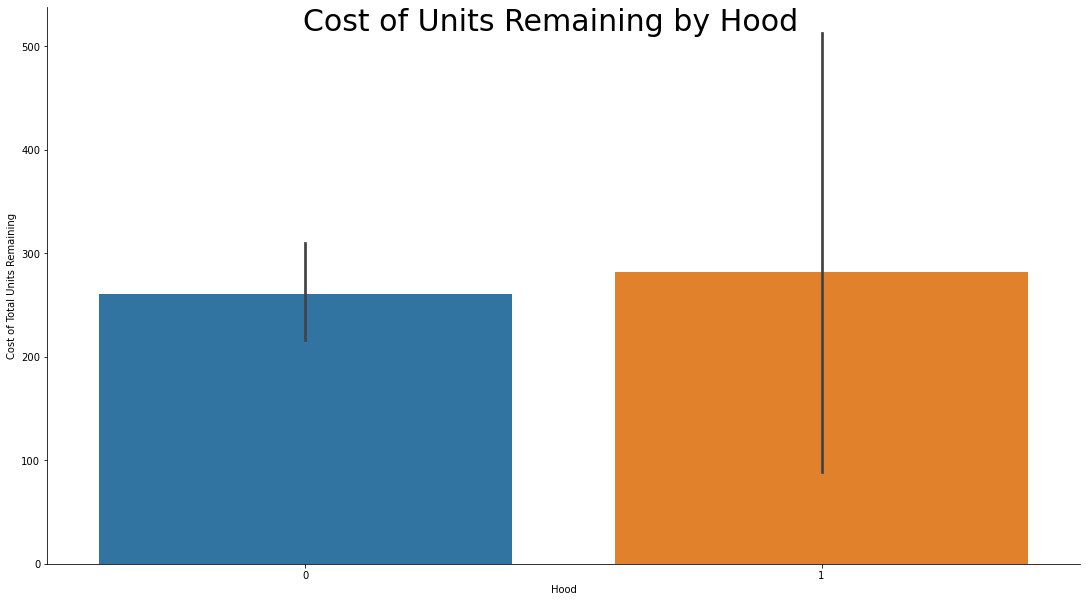

In [36]:
g=sns.catplot(data=clean_df, x='Hood', y='Cost of Total Units Remaining', kind="bar", height=8.27, aspect=15/8.27)
g.fig.suptitle('Cost of Units Remaining by Hood', fontsize=30);

### Image Count

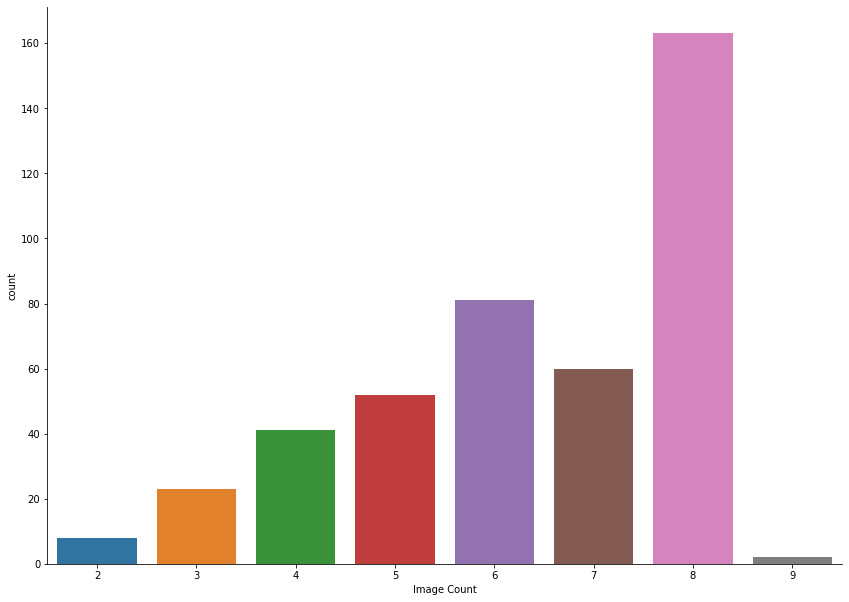

In [37]:
sns.catplot(x="Image Count",kind="count", data=clean_df,  height=8.27, aspect=11.7/8.27 );

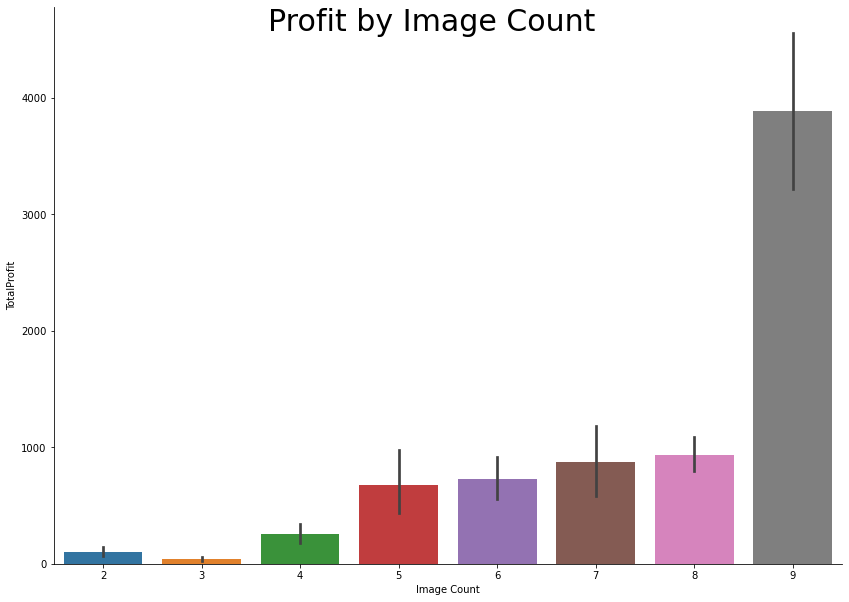

In [38]:
g=sns.catplot(data=clean_df, x='Image Count', y='TotalProfit', kind="bar", height=8.27, aspect=11.7/8.27)
g.fig.suptitle('Profit by Image Count', fontsize=30);

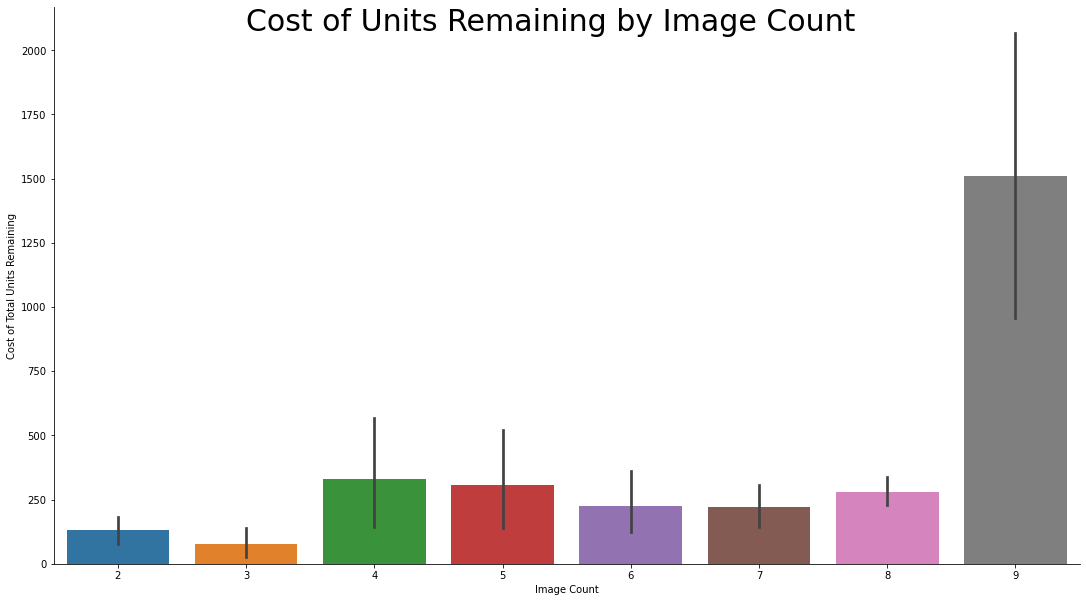

In [39]:
g=sns.catplot(data=clean_df, x='Image Count', y='Cost of Total Units Remaining', kind="bar", height=8.27, aspect=15/8.27)
g.fig.suptitle('Cost of Units Remaining by Image Count', fontsize=30);

### Buy It Now Price

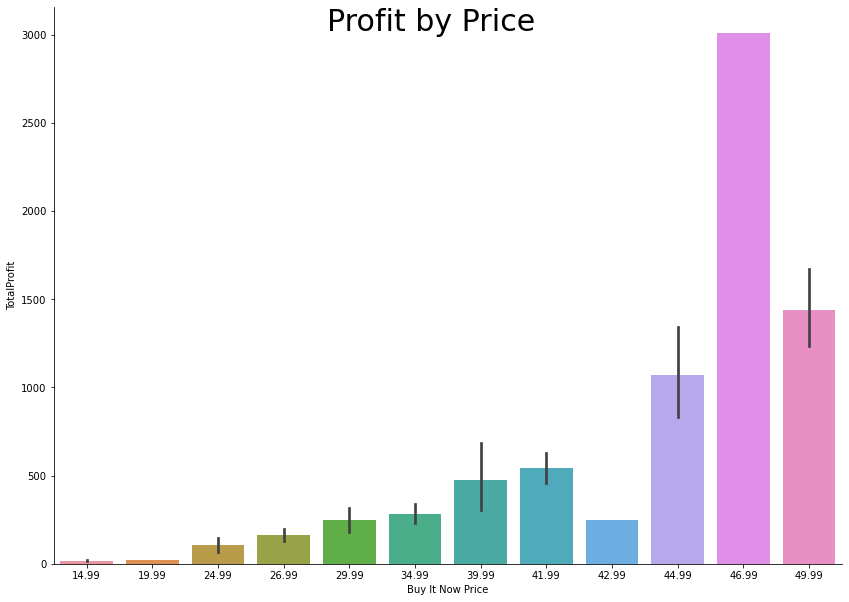

In [40]:
g= sns.catplot(data=clean_df, x='Buy It Now Price', y='TotalProfit', kind="bar", height=8.27, aspect=11.7/8.27)
g.fig.suptitle('Profit by Price', fontsize=30);

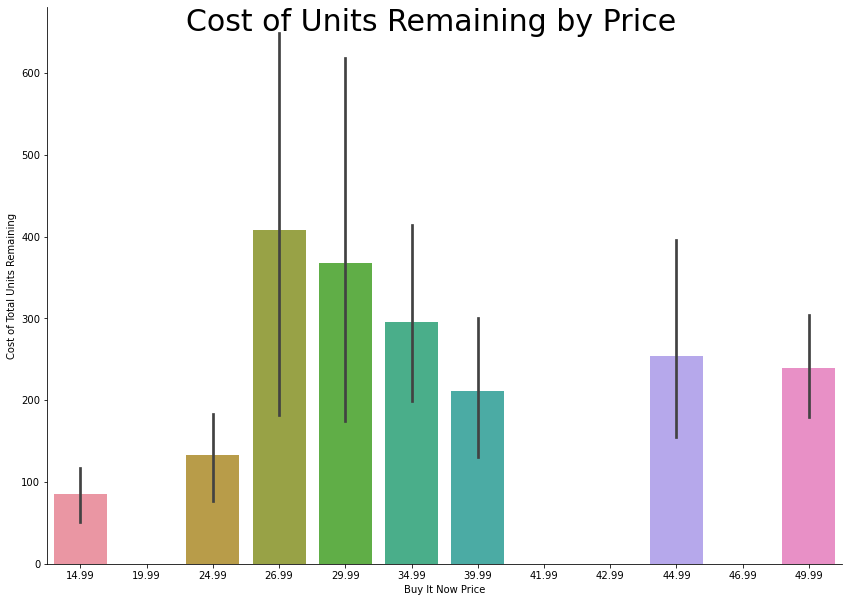

In [41]:
g=sns.catplot(data=clean_df, x='Buy It Now Price', y='Cost of Total Units Remaining', kind="bar", height=8.27, aspect=11.7/8.27)
g.fig.suptitle('Cost of Units Remaining by Price', fontsize=30);

In [42]:
from collections import Counter
cat=['Change Price?', 'Category', 'Character', 'Color', 'Classification', 'Hood', 'Lights',
       'AMZSize']
for i in cat:
    counts=pd.value_counts(clean_df[i])
    print(counts)
# Counter(clean_df.cat)

False    300
True     130
Name: Change Price?, dtype: int64
Pop culture    162
Comedy          63
Cute            58
Costume         47
Religious       40
Alcohol         37
Naughty         14
3D Pop out       9
Name: Category, dtype: int64
Santa              118
Reindeer            66
Elf                 43
Jesus               33
Dog                 29
Cat                 16
Polar bear          14
Skull               12
Mrs. Claus          10
Penguins             9
Gingerbread man      8
Menorah              7
Sleigh               7
Giraffe              7
Tv Show              7
Dinosaur             7
Tree                 6
Snowman              6
Llama                5
Wine                 5
Godzilla             5
Fireplace            5
Tuxedo               2
Yeti                 2
Internet             1
Name: Character, dtype: int64
black         169
red            96
blue           48
green          42
grey           23
multicolor     13
yellow         12
white          11
turquoise 

In [43]:
clean_df[cat].apply(pd.Series.value_counts)
# df.apply(pd.Series.value_counts)

,Change Price?,Category,Character,Color,Classification,Hood,Lights,AMZSize
False,300.0,NaN,NaN,NaN,NaN,416.0,333.0,NaN
True,130.0,NaN,NaN,NaN,NaN,14.0,97.0,NaN
2X Tall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3D Pop out,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
3X-Large,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0
4X-Large,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
Alcohol,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN
Cat,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN
Comedy,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN
Costume,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN
